# Plot Feature Sets and Compare

In [31]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from time import time
import matplotlib.pylab as plt
%matplotlib inline

## SIFT features

In [28]:
features_path = '../data/sift_features.csv'
features = pd.read_csv(features_path).transpose()

In [30]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
image_0001,0.000000,0.0,0.0,0.0,0.000636,0.001907,0.000636,0.0,0.001272,0.000000,...,0.0,0.000000,0.001272,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
image_0002,0.000000,0.0,0.0,0.0,0.000626,0.003757,0.000000,0.0,0.001252,0.000626,...,0.0,0.000626,0.000626,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
image_0003,0.000847,0.0,0.0,0.0,0.000847,0.002540,0.001693,0.0,0.000847,0.000847,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000847,0.0
image_0004,0.000000,0.0,0.0,0.0,0.000566,0.001697,0.000566,0.0,0.003394,0.000566,...,0.0,0.000000,0.000566,0.0,0.0,0.0,0.0,0.000566,0.000000,0.0
image_0005,0.000000,0.0,0.0,0.0,0.000000,0.002770,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.002770,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [32]:
start = time()
pca = PCA(n_components=1000)
pca.fit(features.values)
end = time()
print('PCA decomposition time is %.4g s' % (end - start))

PCA decomposition time is 9.569 s


In [36]:
ratio = np.sum(pca.explained_variance_ratio_)
print('New features covers %.2g variation of original ones.' % ratio)

New features covers 0.92 variance of original ones.


In [39]:
pca_first_2 = PCA(n_components=2)
pca_first_2.fit(features.values)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
ratio = np.sum(pca_first_2.explained_variance_ratio_) 
print('first two components covers %.2g variation of original ones' % ratio)

first two components covers 0.1 variation of original ones


In [41]:
first_2 = pca_first_2.fit_transform(features.values)

In [42]:
first_2.shape

(2000, 2)

In [22]:
labels = [0 for i in range(1000)]+[1 for i in range(1000)]

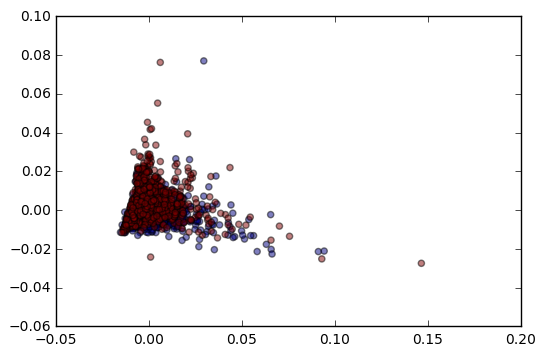

In [49]:
plt.scatter(first_2[:,0],first_2[:,1],c=labels,alpha=0.5)

In [48]:
#new_features = pca.fit_transform(features.values)
#new_df = pd.DataFrame(new_features).transpose()
#new_df.columns = features.index
#new_df.to_csv('../data/sift_features_1000.csv', index=False)

## CNN features

In [54]:
features_path = '../data/cnn_features.csv'
features = pd.read_csv(features_path).transpose()

In [55]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
image_0001.jpg,-0.403729,0.852071,17.932386,-0.260693,3.168043,19.629221,-0.497269,-0.596274,-0.30045,-0.318311,...,4.809986,8.812742,-0.207305,-0.138339,-0.500631,-0.134422,-0.161424,-0.154763,-0.137415,-0.299781
image_0002.jpg,-0.403729,6.792014,34.216606,-0.260693,5.517385,31.738567,1.042152,-0.596274,-0.30045,-0.318311,...,2.052359,-0.627770,-0.207305,-0.138339,-0.500631,-0.134422,-0.161424,-0.154763,-0.182957,-0.299781
image_0003.jpg,-0.403729,-0.366229,7.779723,-0.260693,9.831057,50.882221,0.901816,-0.596274,-0.30045,-0.318311,...,11.963264,-0.661440,-0.207305,-0.138339,-0.275435,-0.134422,-0.161424,-0.154763,-0.182957,-0.299781
image_0004.jpg,-0.403729,2.936385,20.663225,-0.260693,6.721254,17.598795,-0.063723,-0.596274,-0.30045,-0.318311,...,7.205154,1.344268,-0.207305,-0.138339,-0.500631,-0.134422,-0.161424,-0.154763,-0.182957,-0.299781
image_0005.jpg,-0.403729,-0.317822,1.117489,-0.260693,31.622265,37.238338,-0.497269,-0.596274,-0.30045,-0.318311,...,3.369832,1.846070,-0.207305,-0.138339,-0.500631,-0.134422,-0.161424,-0.154763,-0.182957,-0.299781


In [56]:
start = time()
pca = PCA(n_components=150)
pca.fit(features.values)
end = time()
print('PCA decomposition time is %.4g s' % (end - start))

PCA decomposition time is 1.15 s


In [57]:
ratio = np.sum(pca.explained_variance_ratio_)
print('New features covers %.2g variation of original ones.' % ratio)

New features covers 0.97 variation of original ones.


In [58]:
pca_first_2 = PCA(n_components=2)
pca_first_2.fit(features.values)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
ratio = np.sum(pca_first_2.explained_variance_ratio_) 
print('first two components covers %.2g variation of original ones' % ratio)

first two components covers 0.48 variation of original ones


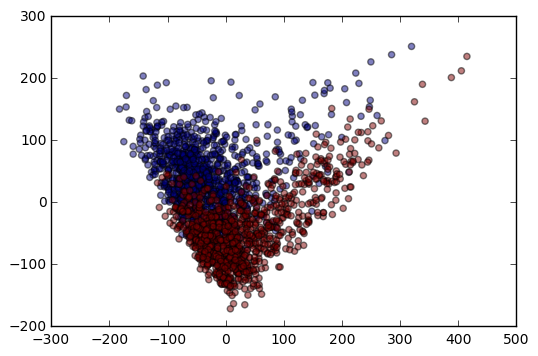

In [60]:
first_2 = pca_first_2.fit_transform(features.values)
labels = [0 for i in range(1000)]+[1 for i in range(1000)]
plt.scatter(first_2[:,0],first_2[:,1],c=labels,alpha=0.5)

In [ ]:
#new_features = pca.fit_transform(features.values)
#new_df = pd.DataFrame(new_features).transpose()
#new_df.columns = features.index
#new_df.to_csv('../data/cnn_features_150.csv', index=False)